<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importations" data-toc-modified-id="Importations-1">Importations</a></span></li><li><span><a href="#Ajout-de-tout-le-barda" data-toc-modified-id="Ajout-de-tout-le-barda-2">Ajout de tout le barda</a></span></li><li><span><a href="#Vue-globale" data-toc-modified-id="Vue-globale-3">Vue globale</a></span></li></ul></div>

In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = 15, 10

# Importations

In [3]:
DATA_X = pd.read_csv("Train/Train/X_station_train.csv")
DATA_Y = pd.read_csv("Train/Train/Y_train.csv")
COORDS = pd.read_csv("Other/Other/stations_coordinates.csv")

In [4]:
train = DATA_X.copy()
y = DATA_Y.copy()
coords = COORDS.copy()

# Ajout de tout le barda

In [5]:
train = train.merge(coords, how="left", on="number_sta")

In [6]:
train["month"] = train["date"].replace(to_replace="^.{5}", value="", regex=True)\
                              .replace(to_replace=".{12}$", value="", regex=True)

train["day"] = train["date"].replace(to_replace="^.{8}", value="", regex=True)\
                            .replace(to_replace=".{9}$", value="", regex=True)

train["hour"] = train["date"].replace(to_replace="^.{11}", value="", regex=True)\
                             .replace(to_replace=".{6}$", value="", regex=True)

In [7]:
train = train.astype({"month": "int8", "day": "int8", "hour": "int8"})
train = train.astype({"Id": str, 
                      "number_sta": "category", 
                      "month": "category", 
                      "day": "category", 
                      "hour": "category"})

# Vue globale

Couleurs = $\texttt{month}$

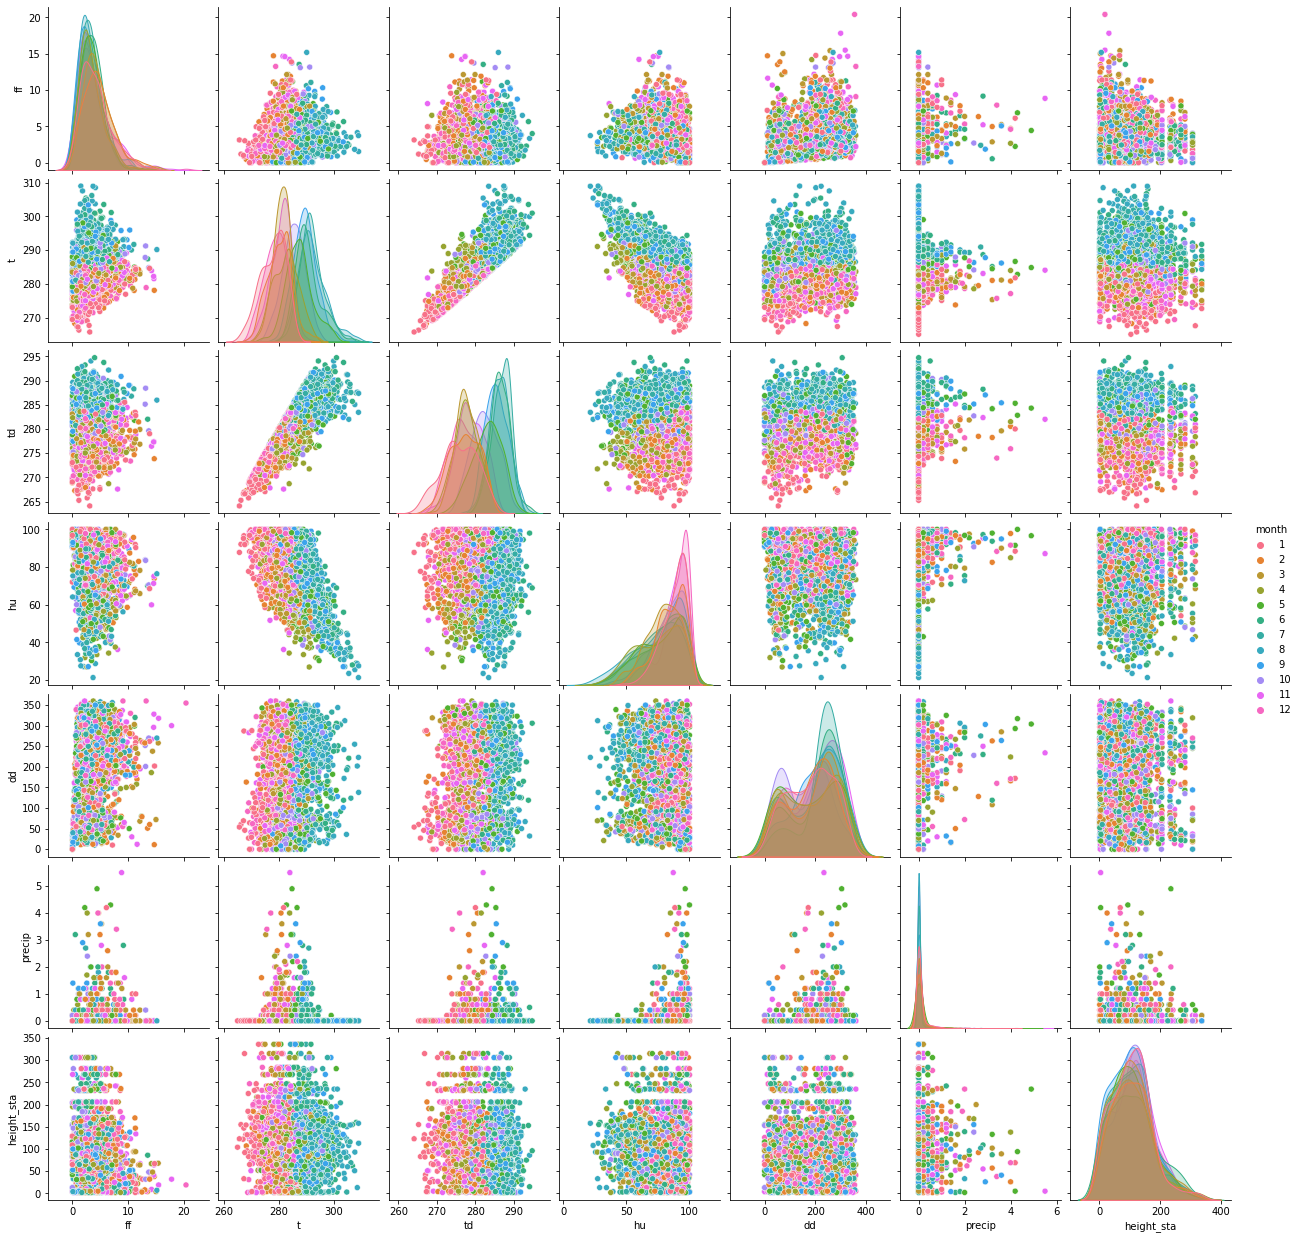

In [8]:
sns.pairplot(train.drop(["lat", "lon"], axis=1).sample(frac=.001), hue="month");